In [3]:
import pandas as pd
import numpy as np
import category_encoders as ce
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [4]:
df = pd.read_csv("C:\\Users\\Bala Vignesh.A\\Desktop\\SCMA 632\\Survey (1).csv")

In [6]:
print(df.columns)

Index(['City', 'Sex', 'Age', 'Occupation', 'Monthly Household Income',
       'Income', 'Planning to Buy a new house', 'Time Frame',
       'Reasons for buying a house', 'what type of House', 'Number of rooms',
       'Size of House', 'Budget', 'Finished/Semi Finished',
       'Influence Decision', 'Maintainance', 'EMI', '1.Proximity to city',
       '2.Proximity to schools', '3. Proximity to transport',
       '4. Proximity to work place', '5. Proximity to shopping',
       '1. Gym/Pool/Sports facility', '2. Parking space', '3.Power back-up',
       '4.Water supply', '5.Security', '1. Exterior look ', '2. Unit size',
       '3. Interior design and branded components',
       '4. Layout plan (Integrated etc.)', '5. View from apartment',
       '1. Price', '2. Booking amount', '3. Equated Monthly Instalment (EMI)',
       '4. Maintenance charges', '5. Availability of loan',
       '1. Builder reputation', '2. Appreciation potential',
       '3. Profile of neighbourhood', '4. Availabilit

In [9]:
df['Sex'] = np.nan

In [10]:
cols = ['City', 'Sex', 'Occupation', 'Monthly Household Income',
       'Income', 'Planning to Buy a new house', 'Time Frame',
       'Reasons for buying a house', 'what type of House', 'Number of rooms',
       'Size of House', 'Budget', 'Finished/Semi Finished',
       'Influence Decision', 'Maintainance', 'EMI', '1.Proximity to city',
       '2.Proximity to schools', '3. Proximity to transport',
       '4. Proximity to work place', '5. Proximity to shopping',
       '1. Gym/Pool/Sports facility', '2. Parking space', '3.Power back-up',
       '4.Water supply', '5.Security', '1. Exterior look ', '2. Unit size',
       '3. Interior design and branded components',
       '4. Layout plan (Integrated etc.)', '5. View from apartment',
       '1. Price', '2. Booking amount', '3. Equated Monthly Instalment (EMI)',
       '4. Maintenance charges', '5. Availability of loan',
       '1. Builder reputation', '2. Appreciation potential',
       '3. Profile of neighbourhood', '4. Availability of domestic help',
       'Time', 'Size', 'Budgets', 'Maintainances', 'EMI.1', 'ages', 'sex',
       'Finished/Semi Finished.1', 'Influence Decision.1']
if all(col in df.columns for col in cols):
    encoder = ce.OrdinalEncoder(cols=cols)
    df_encoded = encoder.fit_transform(df)
else:
    print("The following columns are missing from the DataFrame:")
    for col in cols:
        if col not in df.columns:
            print(col)

# Preprocess the data

In [11]:
encoder = ce.OrdinalEncoder(cols=['City', 'Sex', 'Occupation', 'Monthly Household Income',
       'Income', 'Planning to Buy a new house', 'Time Frame',
       'Reasons for buying a house', 'what type of House', 'Number of rooms',
       'Size of House', 'Budget', 'Finished/Semi Finished',
       'Influence Decision', 'Maintainance', 'EMI', '1.Proximity to city',
       '2.Proximity to schools', '3. Proximity to transport',
       '4. Proximity to work place', '5. Proximity to shopping',
       '1. Gym/Pool/Sports facility', '2. Parking space', '3.Power back-up',
       '4.Water supply', '5.Security', '1. Exterior look ', '2. Unit size',
       '3. Interior design and branded components',
       '4. Layout plan (Integrated etc.)', '5. View from apartment',
       '1. Price', '2. Booking amount', '3. Equated Monthly Instalment (EMI)',
       '4. Maintenance charges', '5. Availability of loan',
       '1. Builder reputation', '2. Appreciation potential',
       '3. Profile of neighbourhood', '4. Availability of domestic help',
       'Time', 'Size', 'Budgets', 'Maintainances', 'EMI.1', 'ages', 'sex',
       'Finished/Semi Finished.1', 'Influence Decision.1'])
df_encoded = encoder.fit_transform(df)


# Select background variables

In [13]:
background_vars = df_encoded.iloc[:, -20:]

# Scale the data

In [14]:
scaler = StandardScaler()
background_vars_scaled = scaler.fit_transform(background_vars)

# Determine the optimal number of clusters using the elbow method

In [15]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(background_vars_scaled)
    wcss.append(kmeans.inertia_)

C:\Users\Bala Vignesh.A\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bala Vignesh.A\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Bala Vignesh.A\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bala Vignesh.A\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak

In [17]:
import matplotlib.pyplot as plt

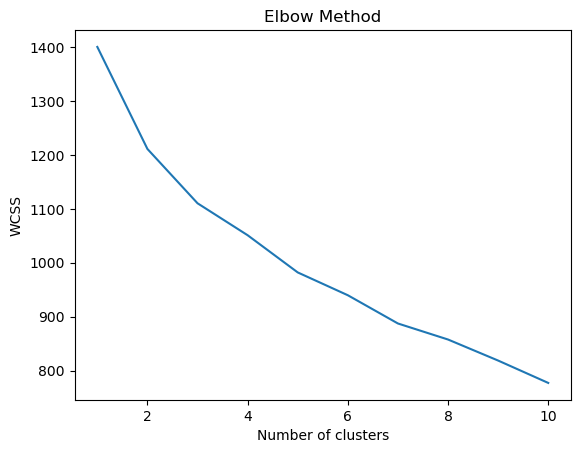

In [18]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Perform K-means clustering with 3 clusters

In [19]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(background_vars_scaled)

C:\Users\Bala Vignesh.A\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bala Vignesh.A\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# Add the cluster labels to the original dataset

In [20]:
df['Cluster'] = clusters


# Analyze and interpret clusters

In [23]:
def numeric_mean(group):
    return group.select_dtypes(include=[np.number]).mean()

print(df.groupby('Cluster').apply(numeric_mean))

         Sex         Income  1.Proximity to city  2.Proximity to schools  \
Cluster                                                                    
0        NaN  185526.315789             4.052632                3.894737   
1        NaN   75000.000000             3.700000                3.500000   
2        NaN   55000.000000             3.142857                2.952381   

         3. Proximity to transport  4. Proximity to work place  \
Cluster                                                          
0                         4.157895                    3.842105   
1                         4.000000                    3.966667   
2                         4.095238                    3.666667   

         5. Proximity to shopping  1. Gym/Pool/Sports facility  \
Cluster                                                          
0                        3.052632                     4.052632   
1                        2.566667                     2.966667   
2                       

# Visualize the clusters

In [37]:
import pandas as pd
from sklearn.cluster import KMeans


In [38]:
from sklearn.preprocessing import StandardScaler


In [40]:
def extract_median_age(age_range):
    ages = age_range.split('-')
    return np.median([int(age) for age in ages])


In [42]:
def extract_median_age(age_range):
    if age_range == '>60':
        return 65  # assume the median age for '>60' is 65
    elif '-' in age_range:
        ages = age_range.split('-')
        return np.median([int(age) for age in ages])
    else:
        return int(age_range) 

In [43]:
df['Age'] = df['Age'].apply(extract_median_age)

# Perform KMeans clustering on the preprocessed 'Age' column

In [44]:
kmeans = KMeans(n_clusters=5)
cluster_labels = kmeans.fit_predict(df[['Age']])

C:\Users\Bala Vignesh.A\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bala Vignesh.A\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# Create a new DataFrame with the cluster labels and ages

In [45]:
cluster_df = pd.DataFrame({'Cluster': cluster_labels, 'Age': df['Age']})

# Group the data by cluster and calculate the mean age for each cluster

In [46]:
cluster_means = cluster_df.groupby('Cluster')['Age'].mean()

# Create a bar plot to visualize the results

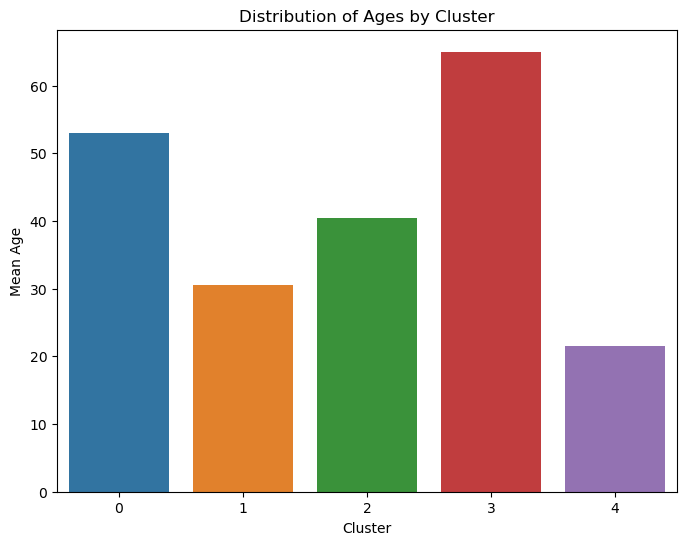

In [47]:
plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_means.index, y=cluster_means.values)
plt.xlabel('Cluster')
plt.ylabel('Mean Age')
plt.title('Distribution of Ages by Cluster')
plt.show()